<a href="https://colab.research.google.com/github/Hanchaeeun/HanChaeEun/blob/main/04_Seasonal_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [144]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [145]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') #set font
plt.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# Data

## Load

In [146]:
df = pd.read_csv('/content/gdrive/MyDrive/tmp_data/merged_df.csv') #전처리 하기 전의 매핑만 된 데이터
df.drop(columns=['지점','지점명','날짜','년도'],inplace=True)
print(df.shape)
df.head()

(61343, 15)


,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광
0,2013-01-01,-2.0,NaN,4.1,160.0,93.0,1021.4,NaN,NaN,3.0,2000.0,0,75.630111,135.0,0.0
1,2013-01-01,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1,77.254281,44.0,0.0
2,2013-01-01,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,2,68.558811,34.0,0.0
3,2013-01-01,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,3,56.934467,41.0,0.0
4,2013-01-01,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,4,44.702936,41.0,0.0


# Seasonal split

In [147]:
day_list = df['일시'].unique()
day_list 

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2019-12-29',
       '2019-12-30', '2019-12-31'], dtype=object)

In [148]:
temp_df = pd.DataFrame()
for day in day_list:
  temp_sum = df[df['일시'] == day]['기온'].sum()
  sum_df = pd.DataFrame([[day, temp_sum]], columns=['일시','기온합계'])
  temp_df = pd.concat([temp_df, sum_df]).reset_index(drop=True)
temp_df.head()

,일시,기온합계
0,2013-01-01,32.4
1,2013-01-02,-27.5
2,2013-01-03,-141.4
3,2013-01-04,-110.9
4,2013-01-05,-70.2


In [149]:
temp_df['월'] = temp_df['일시'].str[5:7]
temp_df['월'] = temp_df['월'].astype(int)
temp_df.head()

,일시,기온합계,월
0,2013-01-01,32.4,1
1,2013-01-02,-27.5,1
2,2013-01-03,-141.4,1
3,2013-01-04,-110.9,1
4,2013-01-05,-70.2,1


In [150]:
#월별 기온의 sum 자료
for i in range(1,13):
  date = datetime(year = 2013, month = i, day = 1)
  month = date.strftime('%b')
  globals()[month] = temp_df[temp_df['월'].isin([i])]['기온합계'].to_numpy(int)

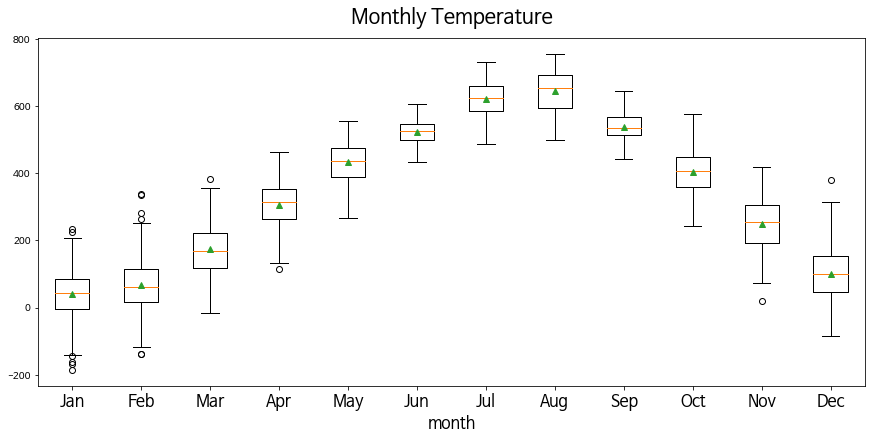

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)

m_list = np.array([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], dtype=object)

ax.boxplot(m_list, showmeans=True)
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
ax.set_title("Monthly Temperature", loc='center', fontsize=20, pad=15)
ax.set_xlabel('month', fontsize=16)
plt.show()

In [152]:
df['일시'] = pd.to_datetime(df['일시'])
df['월'] = df['일시'].dt.month
df.head()

,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월
0,2013-01-01,-2.0,NaN,4.1,160.0,93.0,1021.4,NaN,NaN,3.0,2000.0,0,75.630111,135.0,0.0,1
1,2013-01-01,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1,77.254281,44.0,0.0,1
2,2013-01-01,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,2,68.558811,34.0,0.0,1
3,2013-01-01,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,3,56.934467,41.0,0.0,1
4,2013-01-01,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,4,44.702936,41.0,0.0,1


In [153]:
print('변환 전 : ', df['PM10'].isnull().sum())
df['PM10'] = df['PM10'].replace(-999, np.NaN) #PM10이 잘못 관측된 값(-999) 변환
print('변환후 :',df['PM10'].isnull().sum())

변환 전 :  4442
변환후 : 4989


In [154]:
hot_season = pd.DataFrame()
for i in range(5,11):
  idx = df[df['월'] == i].index
  data = df.loc[idx]
  hot_season = pd.concat([hot_season,data])

In [155]:
cold_season = pd.DataFrame()
for i in [1,2,3,4,11,12]:
  idx = df[df['월'] == i].index
  data = df.loc[idx]
  cold_season = pd.concat([cold_season,data])

In [156]:
print(hot_season['월'].unique())
hot_season.head()

[ 5  6  7  8  9 10]


,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월
2880,2013-05-01,9.4,NaN,4.3,340.0,86.0,1009.8,NaN,NaN,0.0,2000.0,0,39.676925,55.0,0.0,5
2881,2013-05-01,8.8,NaN,4.4,340.0,92.0,1009.6,NaN,NaN,NaN,NaN,1,39.773478,29.0,0.0,5
2882,2013-05-01,8.5,NaN,3.8,340.0,95.0,1009.4,NaN,NaN,NaN,NaN,2,35.973267,30.0,0.0,5
2883,2013-05-01,8.4,NaN,3.9,360.0,96.0,1009.1,NaN,NaN,0.0,1500.0,3,29.011433,33.0,0.0,5
2884,2013-05-01,8.5,NaN,3.1,340.0,95.0,1009.3,NaN,NaN,0.0,1500.0,4,19.844011,41.0,0.0,5


In [157]:
print(cold_season['월'].unique())
cold_season.head()

[ 1  2  3  4 11 12]


,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월
0,2013-01-01,-2.0,NaN,4.1,160.0,93.0,1021.4,NaN,NaN,3.0,2000.0,0,75.630111,135.0,0.0,1
1,2013-01-01,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1,77.254281,44.0,0.0,1
2,2013-01-01,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,2,68.558811,34.0,0.0,1
3,2013-01-01,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,3,56.934467,41.0,0.0,1
4,2013-01-01,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,4,44.702936,41.0,0.0,1


In [158]:
print('Time')
for i in range(0,23):
  zero_df = df[(df['태양광'] == 0. )&(df['시간'] == i)]
  print(f'{i} : ', zero_df['태양광'].count())

Time
0 :  2551
1 :  2556
2 :  2556
3 :  2556
4 :  2556
5 :  2555
6 :  2319
7 :  1337
8 :  329
9 :  31
10 :  13
11 :  13
12 :  12
13 :  11
14 :  12
15 :  8
16 :  4
17 :  7
18 :  109
19 :  984
20 :  1851
21 :  2555
22 :  2553


In [159]:
def drop_idx(df):
  idx = df[df['태양광'] == 0].index
  df.drop(idx, inplace=True)
  df.dropna(subset=['태양광'], inplace=True)
  df.reset_index(inplace=True, drop=True)
  return df

In [160]:
print(hot_season.shape)
drop_idx(hot_season)

(30911, 16)


,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월
0,2013-05-01,9.1,NaN,2.3,320.0,94.0,1009.9,0.3,0.22,0.0,900.0,7,14.246775,36.0,73.32,5
1,2013-05-01,9.8,NaN,2.6,290.0,88.0,1011.0,0.4,0.68,7.0,1200.0,8,26.520814,49.0,211.92,5
2,2013-05-01,10.5,NaN,2.5,290.0,85.0,1011.6,0.5,1.11,3.0,1500.0,9,38.799117,41.0,613.80,5
3,2013-05-01,11.9,NaN,1.7,290.0,79.0,1011.5,1.0,2.16,0.0,1500.0,10,50.718272,33.0,895.92,5
4,2013-05-01,13.2,NaN,2.7,250.0,75.0,1012.0,1.0,2.64,0.0,1500.0,11,61.502172,57.0,1084.08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16974,2019-10-31,19.5,NaN,3.6,290.0,54.0,1020.9,1.0,2.28,0.0,1700.0,14,35.518075,31.0,1121.64,10
16975,2019-10-31,19.7,NaN,4.0,320.0,53.0,1020.8,1.0,1.87,1.0,1934.0,15,27.878531,56.0,967.68,10
16976,2019-10-31,19.4,NaN,4.0,340.0,59.0,1021.1,1.0,1.22,1.0,1860.0,16,18.237642,81.0,703.56,10
16977,2019-10-31,18.4,NaN,3.8,340.0,67.0,1021.4,1.0,0.57,0.0,1375.0,17,7.329575,92.0,269.16,10


In [161]:
print(cold_season.shape)
drop_idx(cold_season)

(30432, 16)


,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월
0,2013-01-01,2.6,0.0,6.0,290.0,91.0,1019.6,0.0,0.03,10.0,1300.0,9,12.470572,43.0,20.16,1
1,2013-01-01,4.2,NaN,5.8,250.0,82.0,1019.9,0.7,0.57,7.0,1300.0,10,21.110853,56.0,106.80,1
2,2013-01-01,3.8,NaN,7.1,320.0,80.0,1020.5,0.7,1.00,9.0,1300.0,11,27.690225,75.0,469.56,1
3,2013-01-01,4.9,0.1,2.8,290.0,73.0,1020.1,0.7,1.05,7.0,1300.0,12,31.491442,84.0,504.24,1
4,2013-01-01,5.2,NaN,6.7,320.0,66.0,1019.7,0.8,1.14,6.0,1100.0,13,31.957150,78.0,745.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14313,2019-12-31,-1.5,NaN,9.1,360.0,59.0,1033.5,0.5,1.04,7.0,2000.0,14,28.822939,24.0,1148.52,12
14314,2019-12-31,-1.5,NaN,9.9,360.0,55.0,1033.6,0.9,1.43,6.0,2000.0,15,22.893481,21.0,830.88,12
14315,2019-12-31,-1.7,NaN,8.9,360.0,60.0,1034.0,0.8,0.86,7.0,2000.0,16,14.724322,20.0,550.92,12
14316,2019-12-31,-1.9,NaN,8.8,360.0,61.0,1034.3,0.8,0.39,6.0,2000.0,17,4.975967,22.0,74.28,12


# Correlation analysis

In [162]:
cold_season['태양광'].unique()

array([  20.16,  106.8 ,  469.56, ...,  329.28,  366.6 , 1307.28])

In [163]:
print('mean Solar')
for i in range(5,24):
  ddf = cold_season[cold_season['시간'] == i]
  mn = ddf['태양광'].mean()
  print(f'{i}: {mn}')

mean Solar
5: nan
6: nan
7: 14.092440944881888
8: 45.51052523171986
9: 159.1512249799838
10: 383.52952380952405
11: 605.183391442155
12: 757.7622802850342
13: 825.3516323296351
14: 798.7927993655834
15: 651.2633544303809
16: 462.9840758293837
17: 239.9046835443033
18: 84.75843670348338
19: 24.44837209302325
20: 0.9795918367346939
21: nan
22: nan
23: nan


In [164]:
min = cold_season[cold_season['시간'] == 8]['태양광'].min()
max = cold_season[cold_season['시간'] == 8]['태양광'].max()
print(min, max)

0.12 290.76


In [165]:
def solar_deviation(df):
  for h in range(0,24):
    h_df = df[df['시간'] == h]
    idx = h_df.index

    mean = h_df['태양광'].mean()
    for i in idx:
      df.loc[i,'태양광편차'] = df.loc[i, '태양광'] - mean
  return df

In [166]:
solar_deviation(cold_season)

,일시,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,남중고도,PM10,태양광,월,태양광편차
0,2013-01-01,2.6,0.0,6.0,290.0,91.0,1019.6,0.0,0.03,10.0,1300.0,9,12.470572,43.0,20.16,1,-138.991225
1,2013-01-01,4.2,NaN,5.8,250.0,82.0,1019.9,0.7,0.57,7.0,1300.0,10,21.110853,56.0,106.80,1,-276.729524
2,2013-01-01,3.8,NaN,7.1,320.0,80.0,1020.5,0.7,1.00,9.0,1300.0,11,27.690225,75.0,469.56,1,-135.623391
3,2013-01-01,4.9,0.1,2.8,290.0,73.0,1020.1,0.7,1.05,7.0,1300.0,12,31.491442,84.0,504.24,1,-253.522280
4,2013-01-01,5.2,NaN,6.7,320.0,66.0,1019.7,0.8,1.14,6.0,1100.0,13,31.957150,78.0,745.20,1,-80.151632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14313,2019-12-31,-1.5,NaN,9.1,360.0,59.0,1033.5,0.5,1.04,7.0,2000.0,14,28.822939,24.0,1148.52,12,349.727201
14314,2019-12-31,-1.5,NaN,9.9,360.0,55.0,1033.6,0.9,1.43,6.0,2000.0,15,22.893481,21.0,830.88,12,179.616646
14315,2019-12-31,-1.7,NaN,8.9,360.0,60.0,1034.0,0.8,0.86,7.0,2000.0,16,14.724322,20.0,550.92,12,87.935924
14316,2019-12-31,-1.9,NaN,8.8,360.0,61.0,1034.3,0.8,0.39,6.0,2000.0,17,4.975967,22.0,74.28,12,-165.624684


In [167]:
def correlation(df, name):
  fig, ax = plt.subplots(figsize=(13,8))
  plt.title(f'{name} correlation',pad = 15, fontsize=18)
  
  data = df.copy()
  data.drop(columns=['월','시간'], inplace=True)
  corr_df = data.corr()
  solar_corr = corr_df[['태양광']].sort_values('태양광')
  
  #대각선 위의 중복된 부분을 안보기
  #mask = np.zeros_like(corr_df, dtype=np.bool)
  #mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_df, 
            cmap = 'RdBu_r', 
            annot = True, 
            #mask = mask,   
            linewidths = .8, 
            vmin = -1,vmax = 1
             )  
  plt.savefig(f'{name}_corr.png',dpi=200)
  plt.rc('axes', unicode_minus=False)
  plt.show()

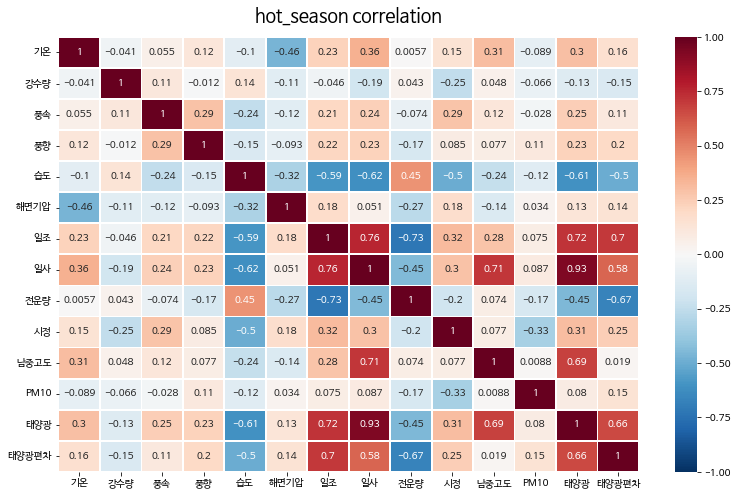

In [168]:
solar_deviation(hot_season)
correlation(hot_season, 'hot_season')

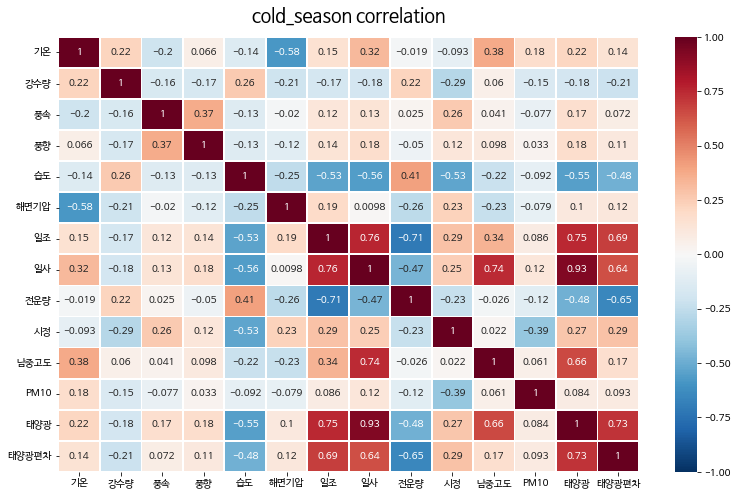

In [169]:
correlation(cold_season, 'cold_season')

In [170]:
def Scatter(df,target, name):
  col_list = [x for x in df.columns if x not in ['일시','월','시간','태양광','태양광편차']]
  #high_list = ['일조', '일사', '전운량', '습도']
  plt.figure(figsize=(21,15))

  for idx, col in enumerate(col_list):
    ax = plt.subplot(3, 4, idx+1)
    sns.regplot(x = hot_season[target], y = hot_season[col] , data = df, scatter_kws = {'color':'b', 's':6}, line_kws = {'color':'r'})
    ax.set_title(f'{target} ~ {col}', fontsize = 12)
    ax.set_xlabel(f'{target}', fontsize = 8)
    ax.set_ylabel(f'{col}') 
  
  plt.suptitle(f'{name}_Scatter Diagram', fontsize = 20) 
  plt.show()

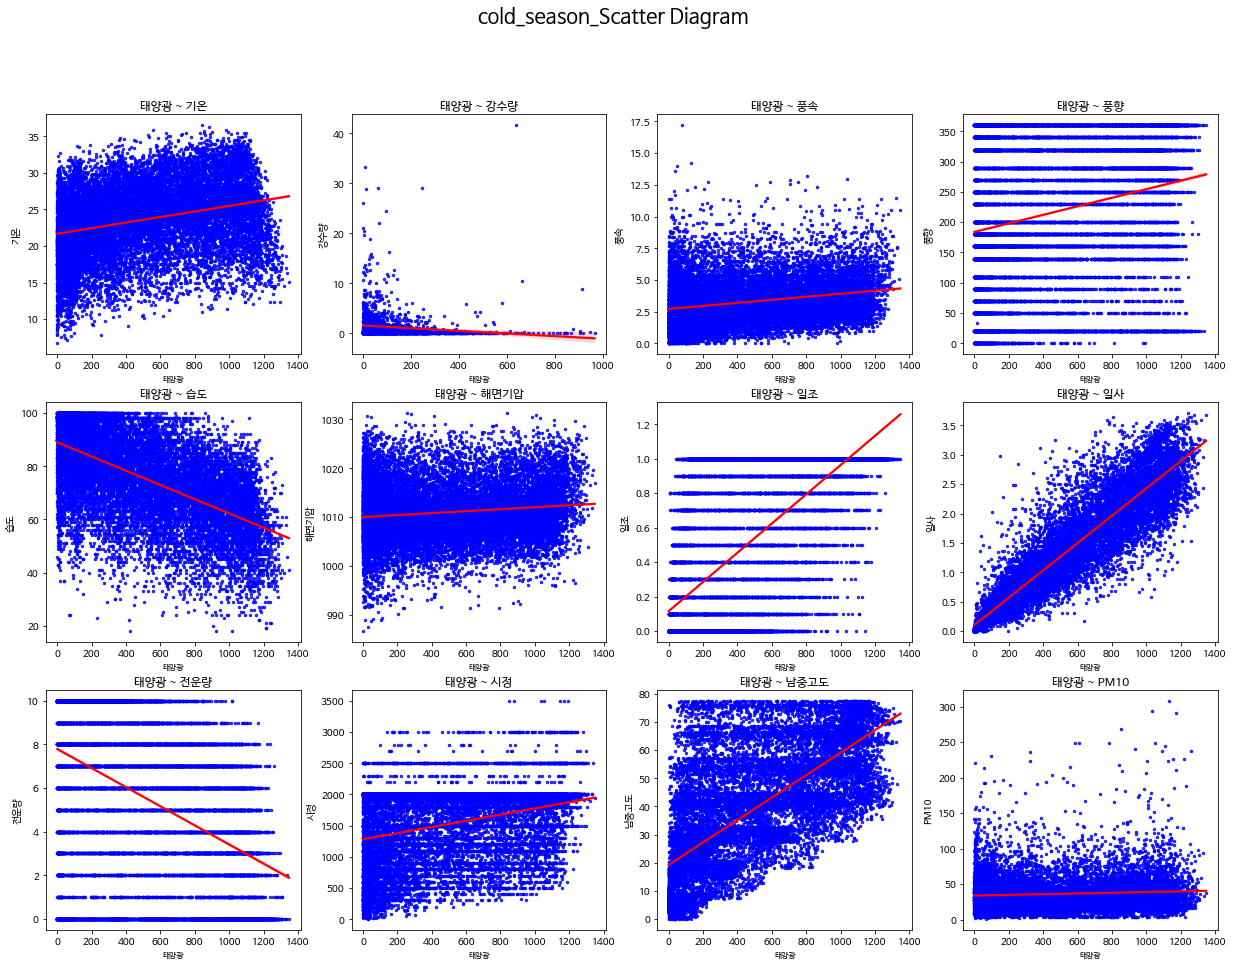

In [171]:
Scatter(cold_season,'태양광','cold_season')

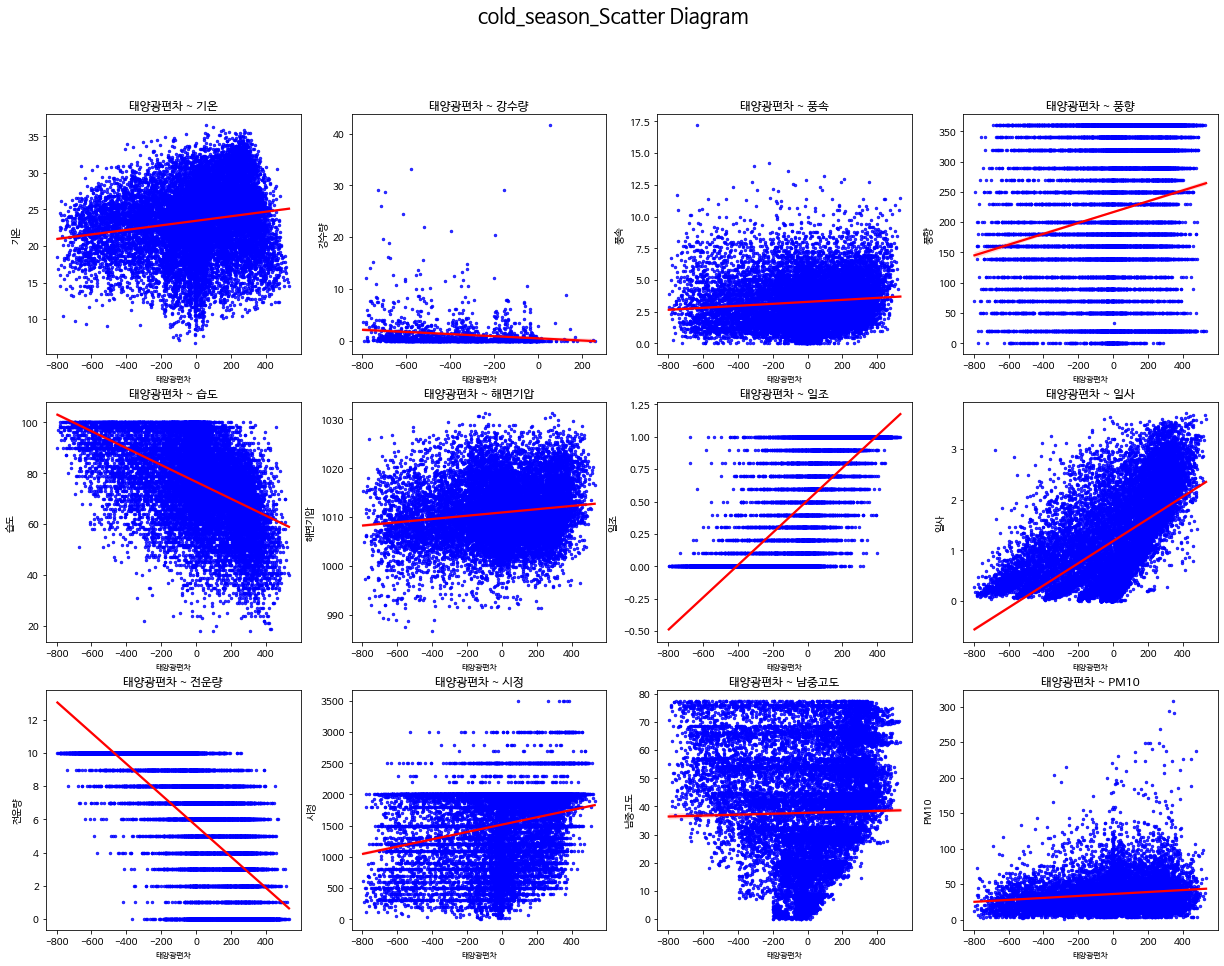

In [172]:
Scatter(cold_season,'태양광편차','cold_season')

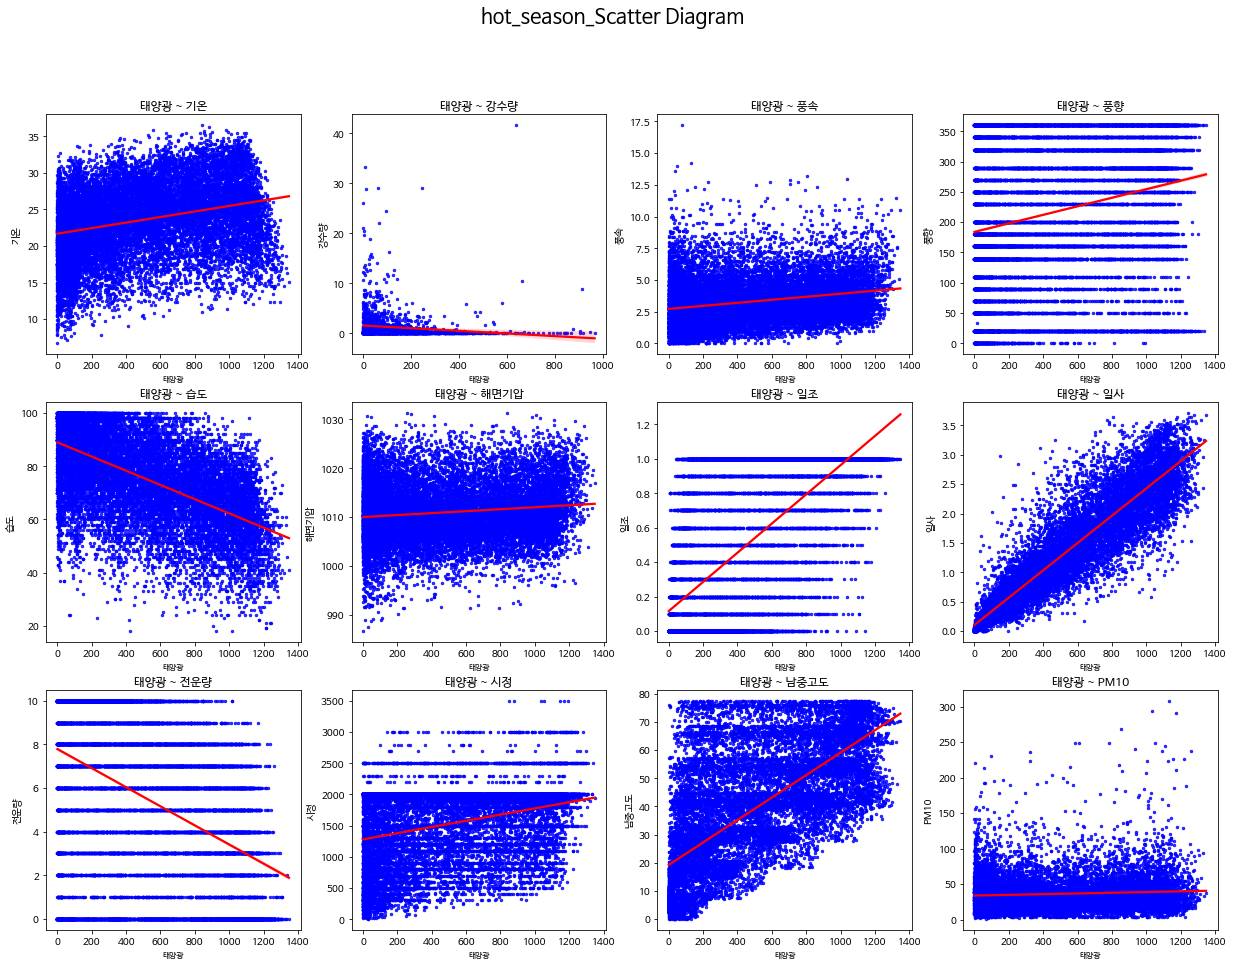

In [173]:
Scatter(hot_season,'태양광','hot_season')

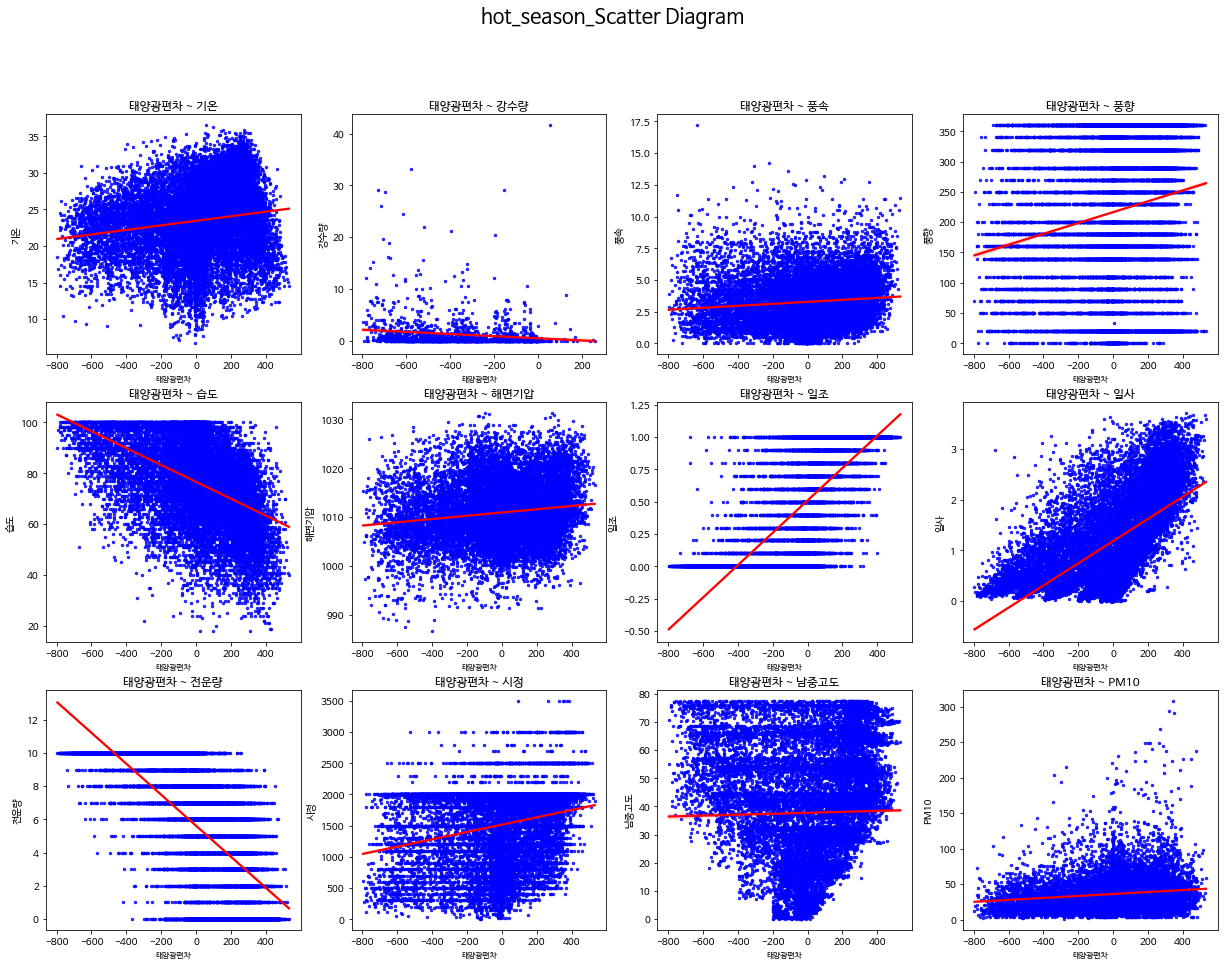

In [174]:
Scatter(hot_season,'태양광편차','hot_season')

# 전운량

In [175]:
for m in range(1,13):
  max = cold_season['전운량'].max()
  df = cold_season[cold_season['전운량'] == max]
  print(m,len(df[df['월'] == m]))

1 230
2 324
3 465
4 653
5 0
6 0
7 0
8 0
9 0
10 0
11 468
12 297


In [177]:
day_list 

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2019-12-29',
       '2019-12-30', '2019-12-31'], dtype=object)

In [178]:
def monthly_plot(df, col):

  result_df = pd.DataFrame()
  for d in day_list:
    sum = df[df['일시'] == d][col].sum()
    sum_df = pd.DataFrame([[d, sum]], columns=['일시',f'{col}합계'])
    result_df = pd.concat([result_df, sum_df]).reset_index(drop=True)

  result_df['월'] = result_df['일시'].str[5:7]
  result_df['월'] = result_df['월'].astype(int)

  for i in range(1,13):
    date = datetime(year = 2013, month = i, day = 1)
    month = date.strftime('%b')
    globals()[month] = result_df[result_df['월'].isin([i])][f'{col}합계'].to_numpy(int)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), constrained_layout=True)
  m_list = np.array([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], dtype=object)

  ax1.boxplot(m_list, showmeans=True)
  ax1.set_xticks(range(1,13))
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
  ax1.set_title(f"Monthly {col}", loc='center', fontsize=20, pad=15)
  ax1.set_xlabel('month', fontsize=16)

  result_df['일시'] = pd.to_datetime(result_df['일시'])
  data_19 = result_df[result_df['일시'].dt.year == 2019]
  idx = data_19[data_19['월'] == 4].index
  df = data_19.loc[idx]
  
  ax2.bar(range(len(df)), df[f'{col}합계'])
  ax2.set_title(f'4월 {col}', loc='center', fontsize=20, pad=15)
  ax1.set_xticks(range(1,13))

  plt.show()

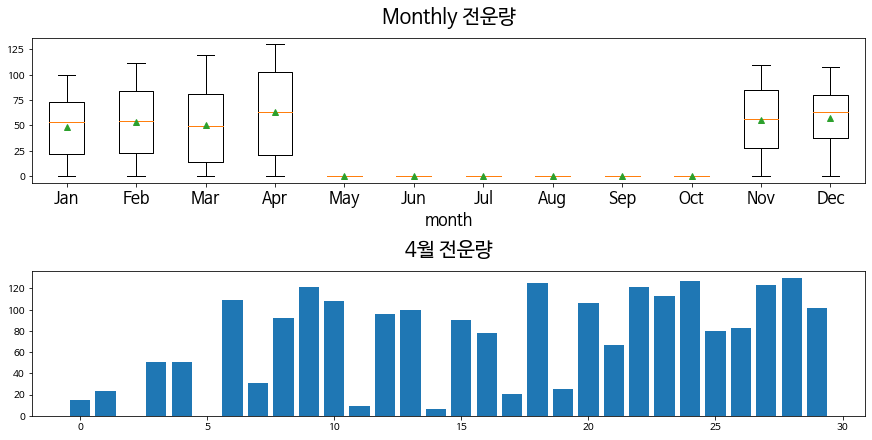

In [179]:
monthly_plot(cold_season, '전운량')